# Ensemble Meta-Methods

![](banner_ensemble.jpg)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
update_geom_defaults("segment",    list(size=0.5, colour="black"))

== document setup ==

## Introduction

Motivation, context, history, related topics ...

## Synopsis

An ensemble meta-method is a data analytic method that combines several models to build a new classification or regression model.  Three popular ensemble meta-methods include bootstrap aggregating (bagging), boosting, and stacking.  The random forest meta-method is a variant of bootstrap aggregating.

Bootstrap aggregating combines models built using a single data analytic method, a single set of hyper-parameter values, but different data samples.

Boosting combines models built using a single data analytic method, a single set of hyper-parameter values, but different data samples biased by model performance.

Stacking combines models built using different data analytic methods and/or hyper-parameter values, but a single dataset to transform the data representation, and then builds a new model using a different data analytic method and/or hyper-parameter values, and transformed data.

Random forest combines models built using the decision tree method, a single set of hyper-parameter values, different variable samples, and different data samples.

**Terms**

* Bootstrap Aggregating or Bagging
* Random Forest
* Boosting
* Stacking

## Exposition

### Data

Consider this dataset and new observation.  The scatterplot shows the observations jittered to expose those with identical x1, x2 values.

observations,variables
72,3


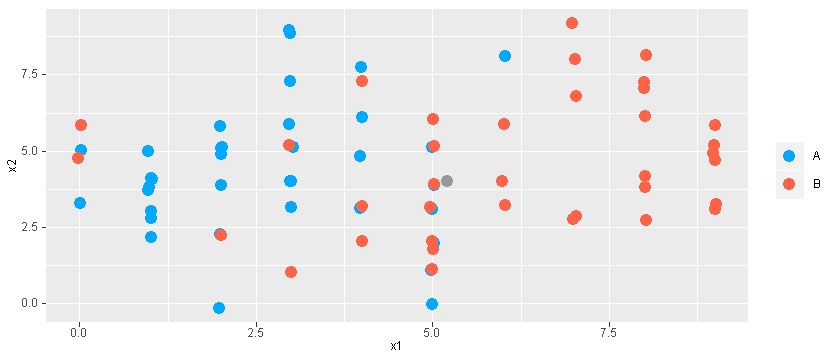

In [2]:
data = data.frame(x1=c(1,2,3,4,3,2,5,4,3,2,5,3,3,2,3,1,1,5,4,1,5,1,0,0,1,2,2,5,1,3,1,2,3,4,5,6,3,2,6,5,4,5,3,8,9,0,0,9,7,4,5,5,4,5,6,6,9,8,7,7,8,8,9,9,7,7,5,5,8,8,9,8),
                  x2=c(3,2,6,5,4,5,3,8,9,0,0,9,7,4,5,5,4,5,6,3,2,4,3,5,4,6,5,1,2,3,4,5,4,3,4,8,1,2,3,4,3,2,5,4,3,6,5,3,3,2,3,6,7,5,4,6,5,7,8,9,8,7,6,5,7,3,1,2,3,4,5,6),
                  class=c("A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B"))
new = data.frame(x1=5.2, x2=4)

size(data)
ggplot(data) +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) + 
scale_color_manual(values=PALETTE)

### Model Based on Original Data

Here is a decision tree model built using the original data.  We can use the model to predict the class of the new observation.

probability 
 
 
 A 
 B 
 
 
 
 
 0.4615385 
 0.5384615 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted 
 
 
 
 
 5.2 
 4 
 B

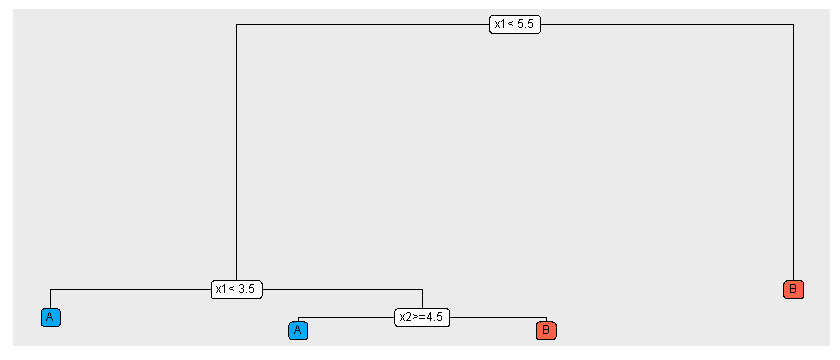

In [3]:
model = rpart(class ~ x1+x2, data, method="class")
prob = predict(model, new, type="prob")
class.predicted = as.class(prob, "A", cutoff=0.5)

row.arrange(prob %>% captionx("probability"), data.frame(new, class.predicted) %>% captionx("new"))

ggtree(model) + scale_fill_manual(values=PALETTE)

### Bootstrap Aggregating (Bagging)


Build a model comprising other constituent models, which are all built using a single data analytic method and set of hyper-parameter values, but based on different bootstrap samples of the data.  The resulting combination of models makes predictions based on the most popular of the constituent models' predictions.

You can think of a bootstrap aggregated model as a committee of experts.  Each expert has studied a particular field of knowledge, different from (but possibly overlapping with) those that the other experts have studied. 

Bootstrap aggregating is also known as "bagging".  

#### Bootstrap Samples

A bootstrap sample of data is a set of randomly selected observations from that data, with replacement allowed.  The number of observations in the bootstrap sample should be the same as the number of observations in the data.  Usually, many of the observations in the bootstrap sample are duplicates of each other.

Here we take 3 different bootstrap samples of the data.

In [4]:
set.seed(12345)
data.1 = sample_n(data, nrow(data), replace=TRUE)
data.2 = sample_n(data, nrow(data), replace=TRUE)
data.3 = sample_n(data, nrow(data), replace=TRUE)

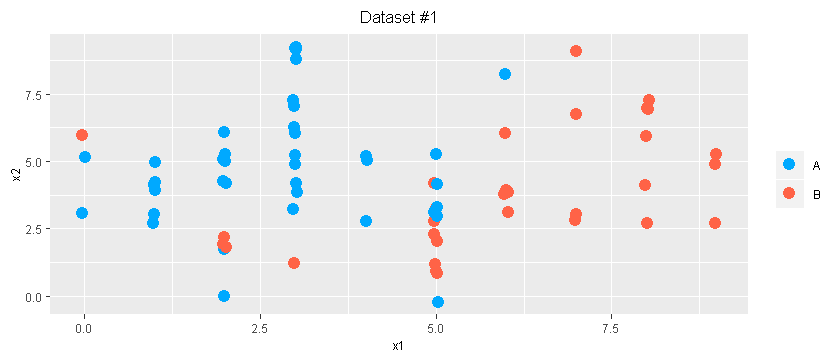

In [5]:
ggplot(data.1) + ggtitle("Dataset #1") +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03))

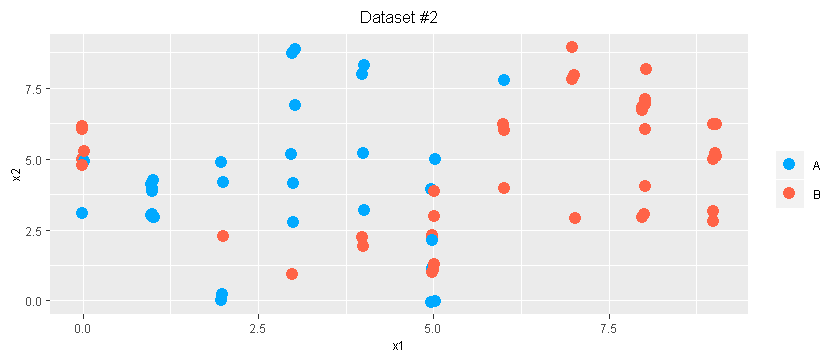

In [6]:
ggplot(data.2) + ggtitle("Dataset #2") +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03))

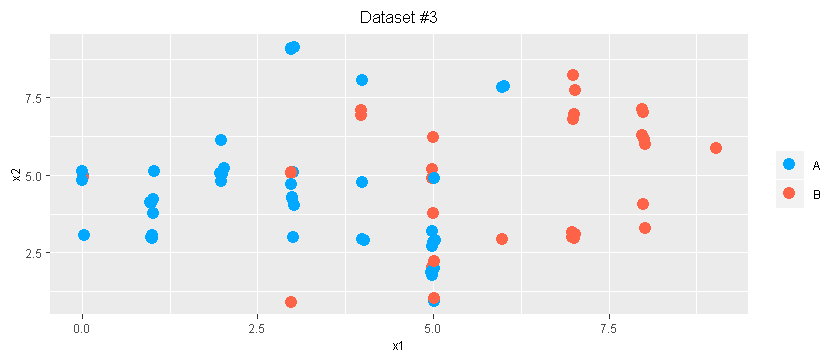

In [7]:
ggplot(data.3) + ggtitle("Dataset #3") +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03))

#### Models Based on Bootstrap Samples

We can build several models, using the same method and hyper-parameter values, but based on the different bootstrap samples of data.  Each model is an "expert" on the particular subset of data represented in the bootstrap sample on which it is based.

Here we build 3 such models.

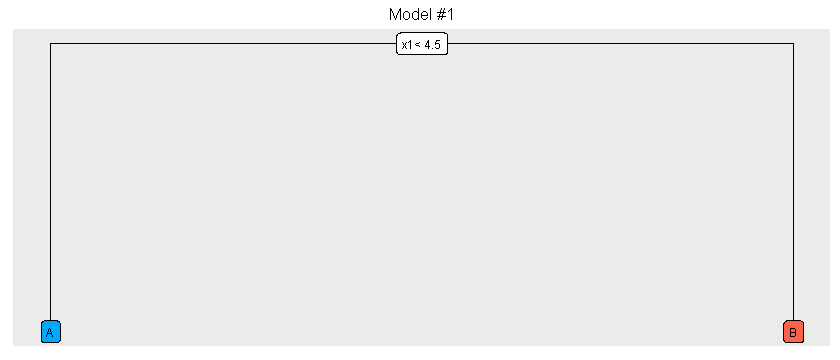

In [8]:
model.1 = rpart(class ~ x1+x2, data.1, method="class")
ggtree(model.1) + ggtitle("Model #1")

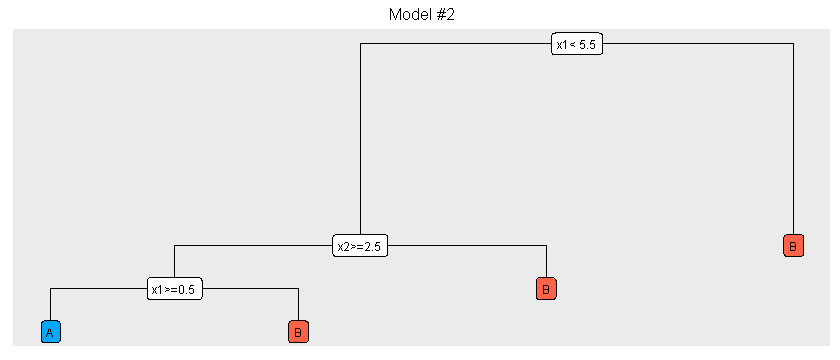

In [9]:
model.2 = rpart(class ~ x1+x2, data.2, method="class")
ggtree(model.2) + ggtitle("Model #2")

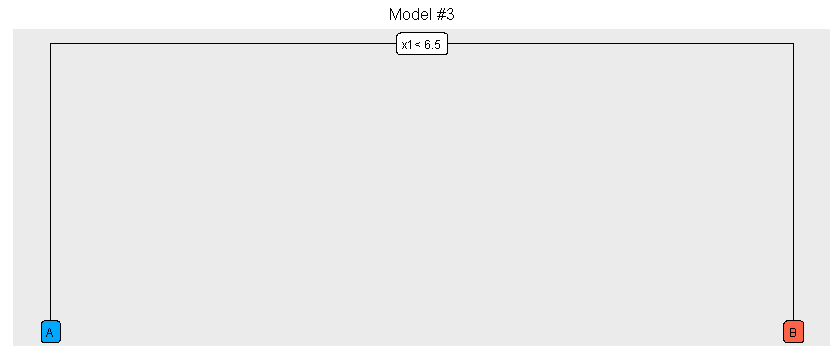

In [10]:
model.3 = rpart(class ~ x1+x2, data.3, method="class")
ggtree(model.3) + ggtitle("Model #3")

#### Predictions

 We use the 3 models to make 3 different predictions of the new observation's class.

New observation's class predicted by Model 1: 

In [11]:
prob.1 = predict(model.1, new, type="prob")
class.predicted.1 = as.class(prob.1, "A", cutoff=0.5)

row.arrange(prob.1 %>% captionx("prob.1"), data.frame(new, class.predicted.1) %>% captionx("new"))

prob.1 
 
 
 A 
 B 
 
 
 
 
 0.2058824 
 0.7941176 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.1 
 
 
 
 
 5.2 
 4 
 B

New observation's class predicted by Model 2: 

In [12]:
prob.2 = predict(model.2, new, type="prob")
class.predicted.2 = as.class(prob.2, "A", cutoff=0.5)

row.arrange(prob.2 %>% captionx("prob.2"), data.frame(new, class.predicted.2) %>% captionx("new"))

prob.2 
 
 
 A 
 B 
 
 
 
 
 0.9166667 
 0.0833333 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.2 
 
 
 
 
 5.2 
 4 
 A

New observation's class predicted by Model 3: 

In [13]:
prob.3 = predict(model.3, new, type="prob")
class.predicted.3 = as.class(prob.3, "A", cutoff=0.5)

row.arrange(prob.3 %>% captionx("prob.3"), data.frame(new, class.predicted.3) %>% captionx("new"))

prob.3 
 
 
 A 
 B 
 
 
 
 
 0.75 
 0.25 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.3 
 
 
 
 
 5.2 
 4 
 A

#### Vote

We compare the predictions of models and vote for the most popular prediction.  Models #1 and #2 predict that the new observation's class is A, and model #3 predicts B.  The vote is 2 to 1 in favor of A, so the bootstrap aggregated model predicts A.

In [14]:
cbind(new, class.predicted.1, class.predicted.2, class.predicted.3,
      class.predicted=vote(class.predicted.1, class.predicted.2, class.predicted.3)) %>% caption("new")

x1,x2,class.predicted.1,class.predicted.2,class.predicted.3,class.predicted
5.2,4,B,A,A,A


### Boosting

Build a model, make predictions, and note the prediction errors.  Then build another model, using the same data analytic method and hyper-parameter values, but based on a resample of the data that emphasizes the observations associated with the prediction errors.  Continue in this way to build more models.  The resulting combination of models makes predictions based on the most popular of the models' predictions.

You can think of a boosted model as a committee of experts.  Each expert (except the first one) has studied a specialized sub-field of knowledge that focuses on the aspects least understood by another expert.

#### Models

**Model #1**

Build Model \#1 based on the original data.  Here we use the decision tree method tlo build the model.

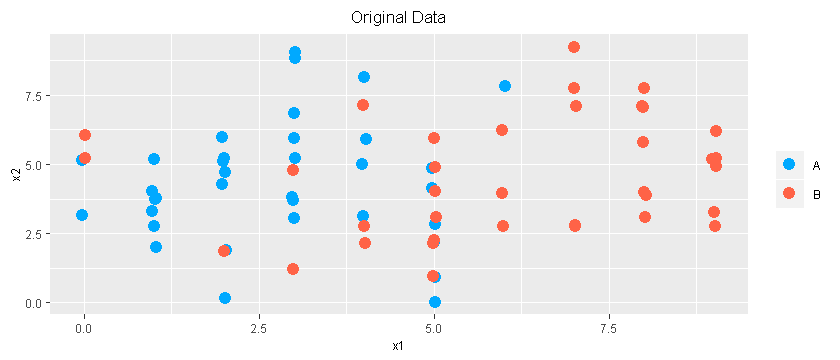

In [15]:
ggplot(data) + ggtitle("Original Data") +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03))

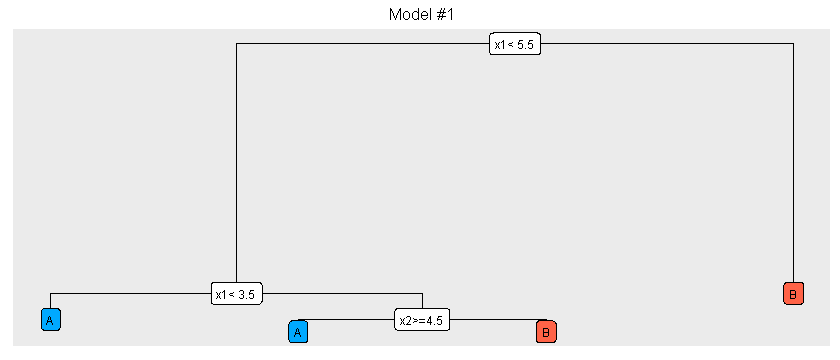

In [16]:
model.1 = rpart(class ~ x1+x2, data, method="class")
ggtree(model.1) + ggtitle("Model #1")

**Model #2**

Assess Model #1's ability to predict the original data's classes.

In [17]:
prob.1 = predict(model.1, data, type="prob")
class.predicted.1 = as.class(prob.1, "A", cutoff=0.5)
hit.1 = class.predicted.1 == data$class

result.1 = data.frame(data, class.predicted.1, hit.1)
head(result.1, 10) %>% caption("first few observations of data")

x1,x2,class,class.predicted.1,hit.1
1,3,A,A,TRUE
2,2,A,A,TRUE
3,6,A,A,TRUE
4,5,A,A,TRUE
3,4,A,A,TRUE
2,5,A,A,TRUE
5,3,A,B,FALSE
4,8,A,A,TRUE
3,9,A,A,TRUE
2,0,A,A,TRUE


Resample the original dataset, choose observations predicted incorrectly by Model \#1 with high probability.  This becomes Dataset \#2.

Here we choose the incorrectly predicted observations with 10 times greater chance than the correctly predicted observations.  Note that observation [ x1=5, x2=3, class=A ] (which appears 7th in the original dataset)  was predicted incorrectly by Model #1 and so it is not surprising that it appears in Dataset #2.

In [18]:
set.seed(12345)
data.2 = focus_data(data, hit.1, emphasis=10)
head(data.2,10) %>% caption("first few observations of data.2", row.names=TRUE)

,x1,x2,class
36,6,8,A
48,9,3,B
24,0,5,A
50,4,2,B
7,5,3,A
35,5,4,A
53,4,7,B
28,5,1,A
15,3,5,A
71,9,5,B


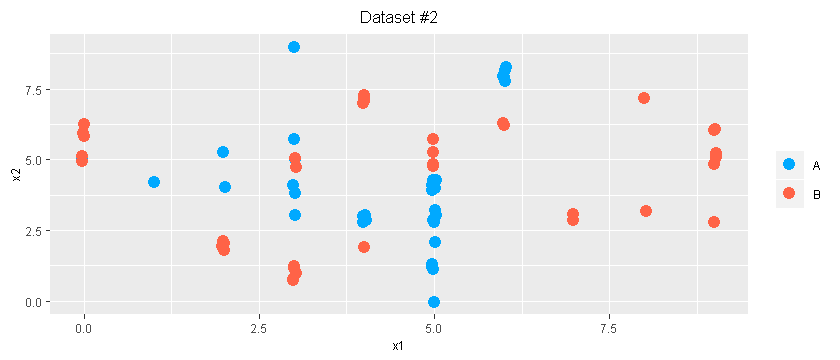

In [19]:
ggplot(data.2) + ggtitle("Dataset #2") +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03)) +
scale_color_manual(values=PALETTE)

Build Model \#2 based on Dataset \#2.  We expect this model to better predict the classes of those observations that Model \#1 predicted incorrectly.

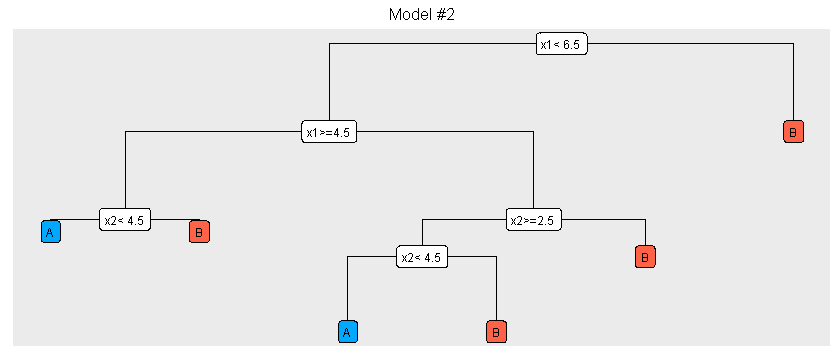

In [20]:
model.2 = rpart(class ~ x1+x2, data.2, method="class")
ggtree(model.2) + ggtitle("Model #2")

**Model #3**

Assess Model #2's ability to predict Dataset #2's classes.

In [21]:
prob.2 = predict(model.2, data.2, type="prob")
class.predicted.2 = as.class(prob.2, "A", cutoff=0.5)
hit.2 = class.predicted.2 == data.2$class

result.2 = data.frame(data.2, class.predicted.2, hit.2)
head(result.2, 10) %>% caption("first few observations of data.2", row.names=TRUE)

,x1,x2,class,class.predicted.2,hit.2
36,6,8,A,B,FALSE
48,9,3,B,B,TRUE
24,0,5,A,B,FALSE
50,4,2,B,B,TRUE
7,5,3,A,A,TRUE
35,5,4,A,A,TRUE
53,4,7,B,B,TRUE
28,5,1,A,A,TRUE
15,3,5,A,B,FALSE
71,9,5,B,B,TRUE


Resample Dataset \#2, choose observations predicted incorrectly by Model \#2 with high probability.  This becomes Dataset \#3.

Here we choose the incorrectly predicted observations with 10 times greater chance than the correctly predicted observations.

In [22]:
set.seed(12345)
data.3 = focus_data(data.2, hit.2, emphasis=10)
head(data.3, 10) %>% caption("first few observations of data.3", row.names=TRUE)

,x1,x2,class
52,5,6,B
53.3,4,7,B
28.3,5,1,A
56,6,6,B
36.1,6,8,A
3,3,6,A
36.2,6,8,A
15,3,5,A
38,2,2,B
50,4,2,B


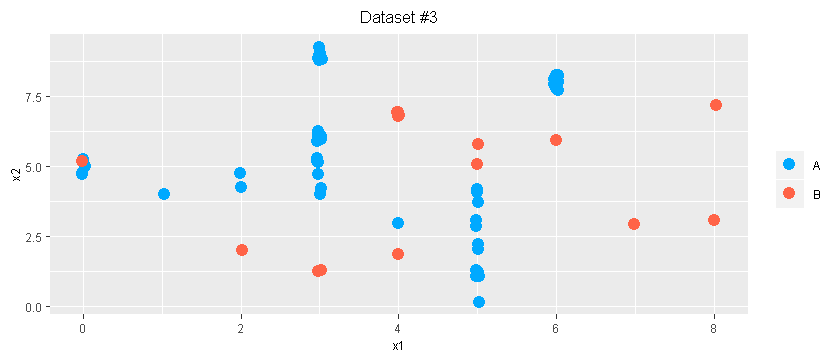

In [23]:
ggplot(data.3) + ggtitle("Dataset #3") +
geom_jitter(aes(x=x1, y=x2, color=class), position = position_jitter(height=0.3, width=0.03))

Build Model \#3 based on Dataset \#3.  We expect this model to better predict the classes of those observations that Model \#2 predicted incorrectly.

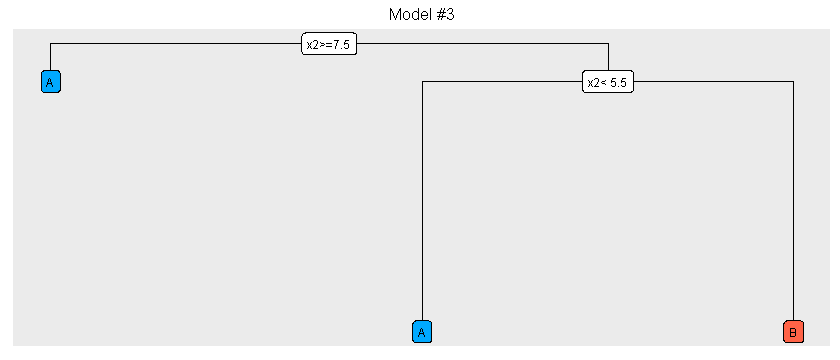

In [24]:
model.3 = rpart(class ~ x1+x2, data.3, method="class")
ggtree(model.3) + ggtitle("Model #3")

#### Predictions

 We use the 3 models to make 3 different predictions of the new observation's class.

New observation's class predicted by Model 1: 

In [25]:
prob.1 = predict(model.1, new, type="prob")
class.predicted.1 = as.class(prob.1, "A", cutoff=0.5)

row.arrange(prob.1 %>% captionx("prob.1"), data.frame(new, class.predicted.1) %>% captionx("new"))

prob.1 
 
 
 A 
 B 
 
 
 
 
 0.4615385 
 0.5384615 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.1 
 
 
 
 
 5.2 
 4 
 B

New observation's class predicted by Model 2: 

In [26]:
prob.2 = predict(model.2, new, type="prob")
class.predicted.2 = as.class(prob.2, "A", cutoff=0.5)

row.arrange(prob.2 %>% captionx("prob.2"), data.frame(new, class.predicted.2) %>% captionx("new"))

prob.2 
 
 
 A 
 B 
 
 
 
 
 1 
 0 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.2 
 
 
 
 
 5.2 
 4 
 A

New observation's class predicted by Model 3: 

In [27]:
prob.3 = predict(model.3, new, type="prob")
class.predicted.3 = as.class(prob.3, "A", cutoff=0.5)

row.arrange(prob.3 %>% captionx("prob.3"), data.frame(new, class.predicted.3) %>% captionx("new"))

prob.3 
 
 
 A 
 B 
 
 
 
 
 0.7714286 
 0.2285714 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.3 
 
 
 
 
 5.2 
 4 
 A

#### Vote

We compare the predictions of the models and vote for the most popular prediction.  

Here model #1 predicts that the new observation's class is B, and models #2 and #3 predict A.  The vote is 2 to 1 in favor of A, so the boosted model predicts A.

In [28]:
cbind(new, class.predicted.1, class.predicted.2, class.predicted.3,
      class.predicted=vote(class.predicted.1, class.predicted.2, class.predicted.3)) %>% caption("new")

x1,x2,class.predicted.1,class.predicted.2,class.predicted.3,class.predicted
5.2,4,B,A,A,A


### Stacking

Build several models and make predictions.  Then build a new model based on the predictions that the other models would make about the original data.

You can think of a stacked model as an expert on a committee of other experts. 

####  Models Based on Original Data

Build several models, using different methods and/or different hyper-parameter values, but based on the same data.

**Model #1**

Here we build a decision tree model (with maximum depth 1):

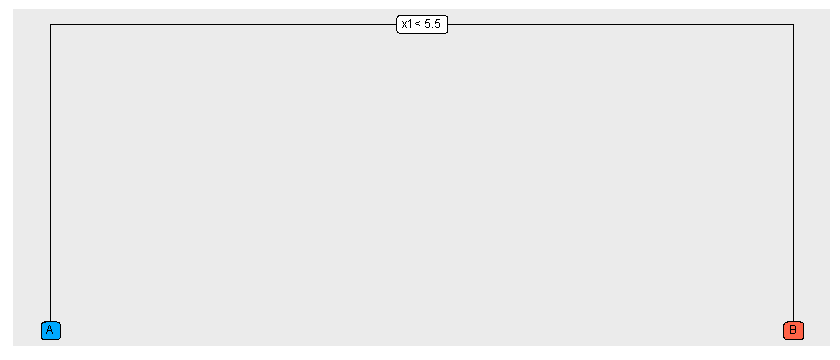

In [29]:
model.1 = rpart(class ~ x1+x2, data, method="class", cp=0.2)
ggtree(model.1)

**Model #2**

Here we build a naive Bayes model:

In [30]:
model.2 = naiveBayes(class ~ x1+x2, data)
model.2


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  A   B 
0.5 0.5 

Conditional probabilities:
   x1
Y       [,1]     [,2]
  A 2.722222 1.614419
  B 6.055556 2.460481

   x2
Y       [,1]     [,2]
  A 4.333333 2.177810
  B 4.527778 2.076895


**Model #3**

Here we build a support vector machine model:

In [31]:
set.seed(12345)
model.3 = svm(class ~ x1+x2, data, kernel="polynomial", cost=0.1, scale=TRUE, probability=TRUE)
model.3


Call:
svm(formula = class ~ x1 + x2, data = data, kernel = "polynomial", 
    cost = 0.1, probability = TRUE, scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  56


#### Transformed Data

The models make these predictions about the original data's classes: 

In [32]:
prob.1 = predict(model.1, data, type="prob")
class.predicted.1 = as.class(prob.1, "A", cutoff=0.5)


# prob.1 = kknn(class ~ x1+x2, data, data, k=1)$prob
# class.predicted.1 = as.class(prob.1, "A", cutoff=0.5)


prob.2 = predict(model.2, data, type="raw")
class.predicted.2 = as.class(prob.2, "A", cutoff=0.5)

prob.3 = attr(predict(model.3, data, probability=TRUE), "probabilities")
class.predicted.3 = as.class(prob.3, "A", cutoff=0.5) # 3)

head(data.frame(data, class.predicted.1, class.predicted.2, class.predicted.3), 10) %>% caption("first few observations of data")

x1,x2,class,class.predicted.1,class.predicted.2,class.predicted.3
1,3,A,A,A,A
2,2,A,A,A,A
3,6,A,A,A,A
4,5,A,A,A,A
3,4,A,A,A,A
2,5,A,A,A,A
5,3,A,A,B,A
4,8,A,A,A,A
3,9,A,A,A,A
2,0,A,A,A,A


So, the transformed data looks like this, based on the models' predictions about the original data's classes.

In [33]:
data.stack = data.frame(class.predicted.1, class.predicted.2, class.predicted.3,
                        class=data$class)
head(data.stack, 10) %>% caption("first few observations of transformed data")

class.predicted.1,class.predicted.2,class.predicted.3,class
A,A,A,A
A,A,A,A
A,A,A,A
A,A,A,A
A,A,A,A
A,A,A,A
A,B,A,A
A,A,A,A
A,A,A,A
A,A,A,A


#### Model Based on Other Model Results

Build a model using the transformed data.

**Stacked Model**

Here we build a logistic regression model:

In [34]:
model.stack = glm(class ~ class.predicted.1+class.predicted.2+class.predicted.3, binomial(link="logit"), data.stack)
model.stack$coefficients

(Intercept) class.predicted.1B class.predicted.2B class.predicted.3B 
         -1.287854          18.848264           1.624327         -16.294365

#### Prediction 

Express the new observation in terms of how its class is predicted by the constituent models.

The new observation [ x1=5.2, x2=4 ] can be expressed as [ class.predicted.1=A, class.predicted.2=B, class.predicted.3=A ] because model #1 predicts the class of [ x1=5.2, x2=4 ] to be A, model #2 predicts the class of [ x1=5.2, x2=4 ] to be B, and model #3 predicts the class of [ x1=5.2, x2=4 ] to be A. 

In [35]:
prob.1 = predict(model.1, new, type="prob")
class.predicted.1 = as.class(prob.1, "A", cutoff=0.5)
row.arrange(prob.1 %>% captionx("prob.1"), cbind(new, class.predicted.1) %>% captionx("new"))

prob.2 = predict(model.2, new, type="raw")
class.predicted.2 = as.class(prob.2, "A", cutoff=0.5)
row.arrange(prob.2 %>% captionx("prob.2"), cbind(new, class.predicted.2) %>% captionx("new"))

prob.3 = attr(predict(model.3, new, probability=TRUE), "probabilities")
class.predicted.3 = as.class(prob.3, "A", cutoff=0.5)
row.arrange(prob.3 %>% captionx("prob.3"), cbind(new, class.predicted.3) %>% captionx("new"))

prob.1 
 
 
 A 
 B 
 
 
 
 
 0.7 
 0.3 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.1 
 
 
 
 
 5.2 
 4 
 A

prob.2 
 
 
 A 
 B 
 
 
 
 
 0.3267745 
 0.6732255 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.2 
 
 
 
 
 5.2 
 4 
 B

prob.3 
 
 
 A 
 B 
 
 
 
 
 0.5698572 
 0.4301428 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted.3 
 
 
 
 
 5.2 
 4 
 A

In [36]:
new.stack = data.frame(class.predicted.1, class.predicted.2, class.predicted.3)
new.stack %>% caption("new (transformed)")

class.predicted.1,class.predicted.2,class.predicted.3
A,B,A


Use the stacked model to predict the class of a new observation.

Here the stacked model predicts the class of the transformed new observation [ class.predicted.1=A, class.predicted.2=B, class.predicted.3=A ] to be B, which means its predicts the class of new observation [ x1=5.2, x2=4 ] to be B.

Note that the stacked model predicts this new observation's class to be B, even though 2 of the 3 constituent models would predict it to be A.

In [37]:
output = predict(model.stack, new, type="response")
prob.stack = data.frame("B"=output, "A"=1-output)
class.predicted = as.class(prob.stack, class="B", cutoff=0.5)

row.arrange(prob.stack %>% captionx, 
            data.frame(class.predicted.1, class.predicted.2, class.predicted.3, class.predicted) %>% captionx("new (transformed)"))

row.arrange(prob.stack %>% captionx, 
            cbind(new, class.predicted) %>% captionx("new"))

prob.stack 
 
 
 B 
 A 
 
 
 
 
 0.5833333 
 0.4166667 
 
 
 
 new (transformed) 
 
 
 class.predicted.1 
 class.predicted.2 
 class.predicted.3 
 class.predicted 
 
 
 
 
 A 
 B 
 A 
 B

prob.stack 
 
 
 B 
 A 
 
 
 
 
 0.5833333 
 0.4166667 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted 
 
 
 
 
 5.2 
 4 
 B

### Random Forest

The **random forest** method is bootstrap aggregation applied to a modified decision tree classification method.  The modification is to use different randomly selected subsets of the predictor variables at various stages of tree construction, rather than use all predictor variables at all stages of tree construction.   

## Code

### Useful Functions

In [38]:
# vote # provided in apparatus code cell above
# focus_data # provided in apparatus code cell above

## Expectations

Know about this:
* How to bootstrap aggregate a classification method, conceptually and using R.
* How to boost a classification method, conceptually and using R.
* How to stack classification methods, conceptually and using R.

## Further Reading

* http://ciml.info/dl/v0_99/ciml-v0_99-ch13.pdf
* https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/
* https://en.wikipedia.org/wiki/Ensemble_learning

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised Sep 20, 2019
</span>
</p>